Importing `numpy`, `pandas` and `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing `ofnumber`, `ofrandom`, `ofseries`

In [2]:
from pyorderedfuzzy.ofnumbers import ofnumber
from pyorderedfuzzy.ofrandoms import generators, estimators
from pyorderedfuzzy.ofmodels import ofseries

Random OFN with normal distribution

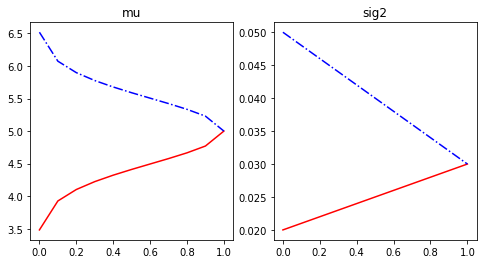

In [3]:
# distribution parameters
mu = ofnumber.init_gaussian(5.0, -0.5, 5.0, 0.5)
sig2 = ofnumber.init_trapezoid_x0x1(0.02, 0.03, 0.05, 0.03)
s2 = 1.0
p = 0.5

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(8,4))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.set_title('mu')
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.set_title('sig2')
mu.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
sig2.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
plt.show()

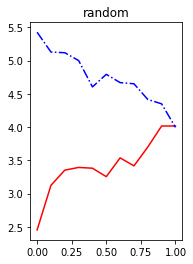

In [4]:
ran_ofn = generators.ofnormal(mu, sig2, s2, p)

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.set_title('random')
ran_ofn.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
plt.show()

Random sample as `OFSeries`

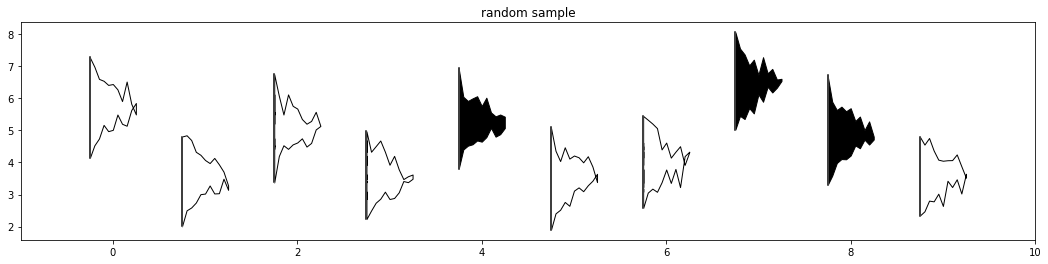

In [5]:
ran_sample = generators.ofnormal_sample(10, mu, sig2, s2, p)

# plot
fig = plt.figure('OFNumber', figsize=(40,4))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.set_title('random sample')
ran_sample.plot_ofseries(ax1)
plt.show()

Estimators

In [6]:
ran_sample = generators.ofnormal_sample(10000, mu, sig2, s2, p)

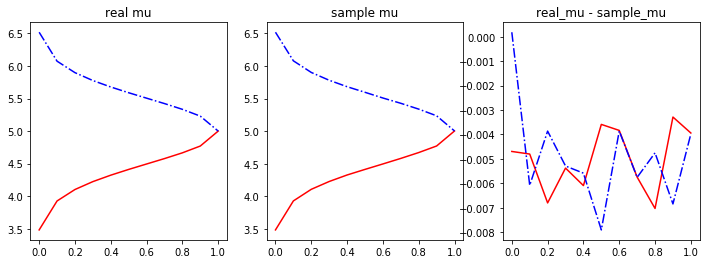

In [7]:
# parameter mu
s_mu = estimators.sample_mu(ran_sample)

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(12,4))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax1.set_title('real mu')
ax2.set_title('sample mu')
ax3.set_title('real_mu - sample_mu')
mu.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
s_mu.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
(mu-s_mu).plot_ofn(ax3, kwargs_f=options_f, kwargs_g=options_g)
plt.show()

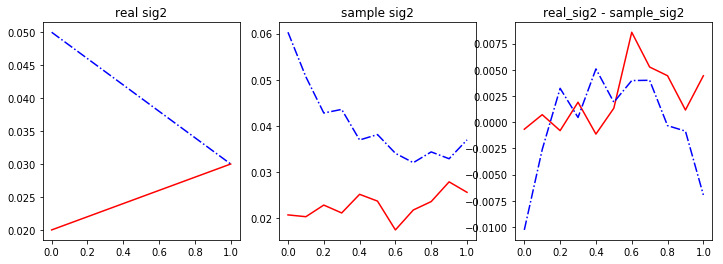

In [8]:
# parameter sig2
s_sig2 = estimators.sample_sig2(ran_sample)

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(12,4))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax1.set_title('real sig2')
ax2.set_title('sample sig2')
ax3.set_title('real_sig2 - sample_sig2')
sig2.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
s_sig2.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
(sig2-s_sig2).plot_ofn(ax3, kwargs_f=options_f, kwargs_g=options_g)
plt.show()

In [9]:
# parameter s2
s_s2 = estimators.sample_s2(ran_sample)

print('real s2:', s2)
print('sample_s2:', s_s2)
print('real_s2 - sample_s2:', s2-s_s2)

real s2: 1.0
sample_s2: 1.00157472945
real_s2 - sample_s2: -0.00157472945155


In [10]:
# parameter p
s_p = estimators.sample_p(ran_sample)

print('real p:', p)
print('sample_p:', s_p)
print('real_p - sample_p:', p-s_p)

real p: 0.5
sample_p: 0.4914
real_p - sample_p: 0.008599999999999997


Fuzzy expected value

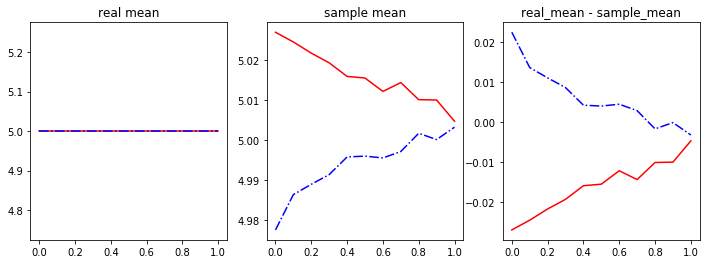

In [11]:
r_mean = p*mu + (1-p)*ofnumber.OFNumber(mu.branch_g, mu.branch_f)
s_mean = estimators.sample_mean(ran_sample)

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(12,4))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax1.set_title('real mean')
ax2.set_title('sample mean')
ax3.set_title('real_mean - sample_mean')
r_mean.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
s_mean.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
(r_mean-s_mean).plot_ofn(ax3, kwargs_f=options_f, kwargs_g=options_g)
plt.show()

Fuzzy Variance

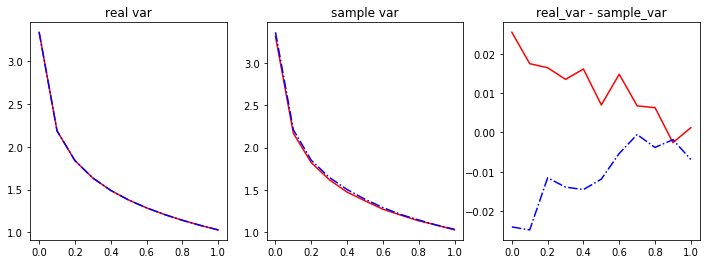

In [12]:
r_var = p*(1-p)*ofnumber.fpower(mu - ofnumber.OFNumber(mu.branch_g, mu.branch_f),2)
r_var = r_var +p*sig2 + (1-p)*ofnumber.OFNumber(sig2.branch_g, sig2.branch_f)
r_var = r_var + s2

p*mu + (1-p)*ofnumber.OFNumber(mu.branch_g, mu.branch_f)
s_var = estimators.sample_var(ran_sample)

# plot 
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(12,4))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax1.set_title('real var')
ax2.set_title('sample var')
ax3.set_title('real_var - sample_var')
r_var.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
s_var.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
(r_var-s_var).plot_ofn(ax3, kwargs_f=options_f, kwargs_g=options_g)
plt.show()